In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
url = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())),'Mutual_Funds.csv')

In [3]:
url

'/Users/deepatamraparani/code/tamraparani/P02-mutual-funds/Mutual_Funds.csv'

In [4]:
# Read Mutual File

mf = pd.read_csv(url)
mf.shape

(29033646, 7)

In [5]:
#First 5 Records
mf.head(100)

,Fund_House,Scheme_Type,Scheme_Category,Scheme_Code,Scheme_Name,Date,NAV
0,Standard Chartered Mutual Fund,Open Ended Schemes,Income,100027,Grindlays Super Saver Income Fund-GSSIF-Half Y...,29-05-2008,10.7205
1,Standard Chartered Mutual Fund,Open Ended Schemes,Income,100027,Grindlays Super Saver Income Fund-GSSIF-Half Y...,28-05-2008,10.7250
2,Standard Chartered Mutual Fund,Open Ended Schemes,Income,100027,Grindlays Super Saver Income Fund-GSSIF-Half Y...,27-05-2008,10.7216
3,Standard Chartered Mutual Fund,Open Ended Schemes,Income,100027,Grindlays Super Saver Income Fund-GSSIF-Half Y...,26-05-2008,10.7206
4,Standard Chartered Mutual Fund,Open Ended Schemes,Income,100027,Grindlays Super Saver Income Fund-GSSIF-Half Y...,23-05-2008,10.7152
...,...,...,...,...,...,...,...
95,Standard Chartered Mutual Fund,Open Ended Schemes,Income,100027,Grindlays Super Saver Income Fund-GSSIF-Half Y...,08-01-2008,10.9111
96,Standard Chartered Mutual Fund,Open Ended Schemes,Income,100027,Grindlays Super Saver Income Fund-GSSIF-Half Y...,07-01-2008,10.9162
97,Standard Chartered Mutual Fund,Open Ended Schemes,Income,100027,Grindlays Super Saver Income Fund-GSSIF-Half Y...,04-01-2008,10.8790
98,Standard Chartered Mutual Fund,Open Ended Schemes,Income,100027,Grindlays Super Saver Income Fund-GSSIF-Half Y...,03-01-2008,10.8614


In [6]:
mf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29033646 entries, 0 to 29033645
Data columns (total 7 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Fund_House       object 
 1   Scheme_Type      object 
 2   Scheme_Category  object 
 3   Scheme_Code      int64  
 4   Scheme_Name      object 
 5   Date             object 
 6   NAV              float64
dtypes: float64(1), int64(1), object(5)
memory usage: 1.5+ GB


In [7]:
mf.describe()

,Scheme_Code,NAV
count,2.903365e+07,2.903365e+07
mean,1.222114e+05,1.802385e+02
std,1.532330e+04,4.014989e+03
min,1.000270e+05,-6.796493e+03
25%,1.082730e+05,1.048240e+01
50%,1.198620e+05,1.219160e+01
75%,1.355680e+05,2.544830e+01
max,1.518760e+05,1.918470e+06


In [8]:
# Get no of Mutual Fund Schemes
print("Number of Schemes are:",len(set(mf['Scheme_Name'])))

Number of Schemes are: 35350


In [9]:
unique_schemes = mf['Scheme_Name'].unique()
unique_fund_houses = mf['Fund_House'].unique()

num_unique_schemes = len(unique_schemes)
num_unique_fund_houses = len(unique_fund_houses)

print("Number of unique schemes:", num_unique_schemes)
print("Number of unique fund houses:", num_unique_fund_houses)

Number of unique schemes: 35350
Number of unique fund houses: 70


In [10]:
scheme_to_fundhouse_mapping = mf[['Scheme_Name', 'Fund_House']].drop_duplicates()


In [11]:
scheme_to_fundhouse_mapping

,Scheme_Name,Fund_House
0,Grindlays Super Saver Income Fund-GSSIF-Half Y...,Standard Chartered Mutual Fund
531,Grindlays Super Saver Income Fund-GSSIF-Quater...,Standard Chartered Mutual Fund
1062,Grindlays Super Saver Income Fund-GSSIF-Growth,Standard Chartered Mutual Fund
1593,Grindlays Super Saver Income Fund-GSSIF-Annual...,Standard Chartered Mutual Fund
2124,Grindlays Super Saver Income Fund-GSSIF - ST-D...,Standard Chartered Mutual Fund
...,...,...
29033626,NAVI Overnight Fund Regular Plan Daily IDCW Re...,Navi Mutual Fund
29033630,NAVI Overnight Fund Regular Plan Weekly IDCW R...,Navi Mutual Fund
29033634,NAVI Overnight Fund Direct Plan Monthly IDCW R...,Navi Mutual Fund
29033638,NAVI Overnight Fund Direct Plan Growth,Navi Mutual Fund


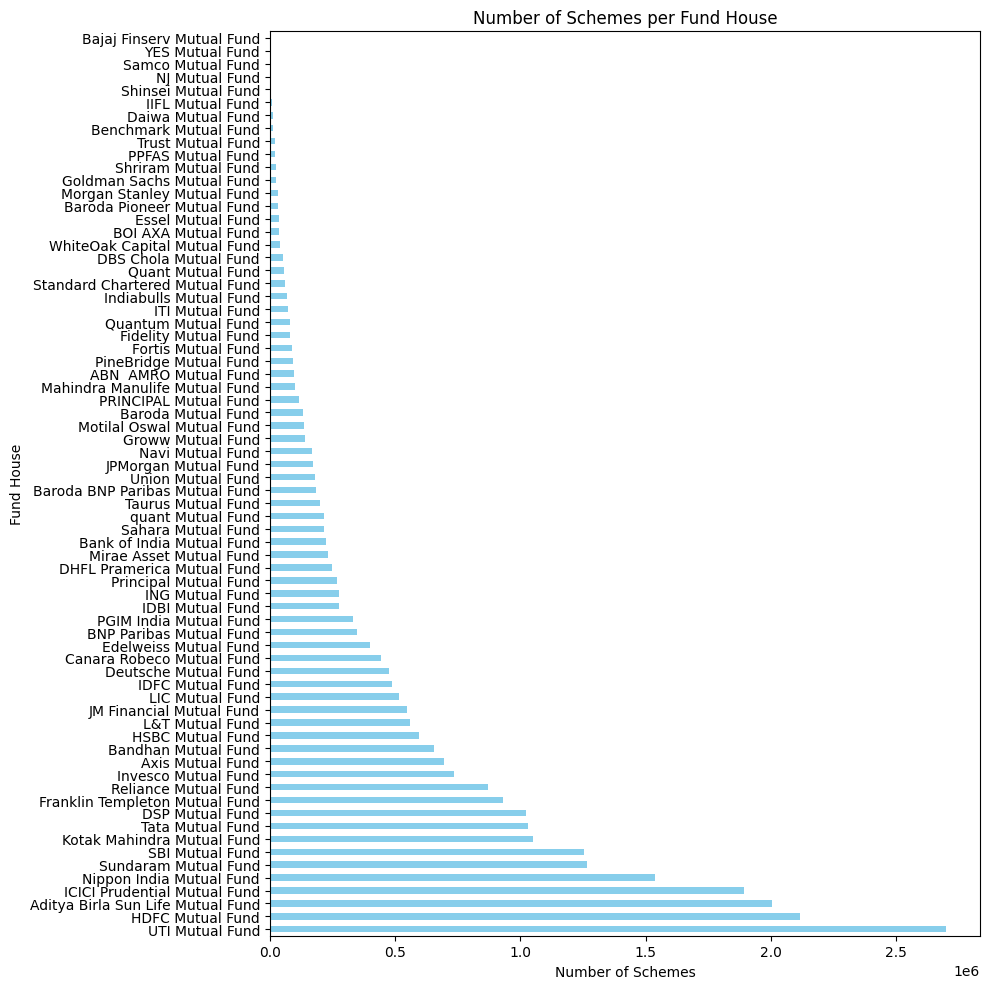

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

fundhouse_scheme_counts = scheme_to_fundhouse_mapping['Fund_House'].value_counts()

# Count the number of schemes per fund house
fundhouse_scheme_counts = mf['Fund_House'].value_counts()

# Plotting a horizontal bar plot
plt.figure(figsize=(10, 10))
fundhouse_scheme_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Schemes')
plt.ylabel('Fund House')
plt.title('Number of Schemes per Fund House')
plt.tight_layout()

# Display plot
plt.show()


In [13]:
mf['Date'] = pd.to_datetime(mf['Date'],format= '%d-%m-%Y')

In [40]:
schemes = mf[['Scheme_Code','Date']].sort_values('Date').groupby('Scheme_Code')


In [15]:
# Get the last date for each scheme
last_dates = schemes.max()
last_dates

,Date
Scheme_Code,
100027,2008-05-29
100028,2008-05-29
100029,2008-05-29
100030,2008-05-29
100031,2008-05-29
...,...
151870,2023-07-21
151873,2023-07-21
151874,2023-07-21


In [16]:
schemes_last_day = last_dates[last_dates['Date'] == '2023-07-21']
schemes_last_day

,Date
Scheme_Code,
100033,2023-07-21
100034,2023-07-21
100037,2023-07-21
100038,2023-07-21
100041,2023-07-21
...,...
151870,2023-07-21
151873,2023-07-21
151874,2023-07-21


In [17]:
schemes_last_day = schemes.nth(-1)
schemes_last_day = schemes_last_day[schemes_last_day['Date']== '2023-07-21']
schemes_last_day = schemes_last_day.reset_index()

In [18]:
relevant_schemes = schemes_last_day['Scheme_Code']

In [19]:
mf = mf[mf['Scheme_Code'].isin(relevant_schemes)]

In [41]:
mf

,Fund_House,Scheme_Type,Scheme_Category,Scheme_Code,Scheme_Name,Date,NAV
3186,Aditya Birla Sun Life Mutual Fund,Open Ended Schemes,Equity Scheme - Large & Mid Cap Fund,100033,Aditya Birla Sun Life Equity Advantage Fund - ...,2023-07-21,670.3900
3187,Aditya Birla Sun Life Mutual Fund,Open Ended Schemes,Equity Scheme - Large & Mid Cap Fund,100033,Aditya Birla Sun Life Equity Advantage Fund - ...,2023-07-20,675.1800
3188,Aditya Birla Sun Life Mutual Fund,Open Ended Schemes,Equity Scheme - Large & Mid Cap Fund,100033,Aditya Birla Sun Life Equity Advantage Fund - ...,2023-07-19,673.4600
3189,Aditya Birla Sun Life Mutual Fund,Open Ended Schemes,Equity Scheme - Large & Mid Cap Fund,100033,Aditya Birla Sun Life Equity Advantage Fund - ...,2023-07-18,669.8700
3190,Aditya Birla Sun Life Mutual Fund,Open Ended Schemes,Equity Scheme - Large & Mid Cap Fund,100033,Aditya Birla Sun Life Equity Advantage Fund - ...,2023-07-17,669.1500
...,...,...,...,...,...,...,...
29033641,Navi Mutual Fund,Open Ended Schemes,Debt Scheme - Overnight Fund,151875,NAVI Overnight Fund Direct Plan Growth,2023-07-18,10.0045
29033642,Navi Mutual Fund,Open Ended Schemes,Debt Scheme - Overnight Fund,151876,NAVI Overnight Fund Direct Plan Weekly IDCW Re...,2023-07-21,10.0096
29033643,Navi Mutual Fund,Open Ended Schemes,Debt Scheme - Overnight Fund,151876,NAVI Overnight Fund Direct Plan Weekly IDCW Re...,2023-07-20,10.0079
29033644,Navi Mutual Fund,Open Ended Schemes,Debt Scheme - Overnight Fund,151876,NAVI Overnight Fund Direct Plan Weekly IDCW Re...,2023-07-19,10.0062


In [20]:
#Scheme Type is the same, however, Scheme Category and Scheme Code are different
mf[mf['Scheme_Name'] == 'CPSE ETF']

,Fund_House,Scheme_Type,Scheme_Category,Scheme_Code,Scheme_Name,Date,NAV
23323182,Nippon India Mutual Fund,Open Ended Schemes,Other Scheme - Other ETFs,140107,CPSE ETF,2023-07-21,44.9035
23323183,Nippon India Mutual Fund,Open Ended Schemes,Other Scheme - Other ETFs,140107,CPSE ETF,2023-07-20,44.7496
23323184,Nippon India Mutual Fund,Open Ended Schemes,Other Scheme - Other ETFs,140107,CPSE ETF,2023-07-19,44.6004
23323185,Nippon India Mutual Fund,Open Ended Schemes,Other Scheme - Other ETFs,140107,CPSE ETF,2023-07-18,44.2261
23323186,Nippon India Mutual Fund,Open Ended Schemes,Other Scheme - Other ETFs,140107,CPSE ETF,2023-07-17,44.2407
...,...,...,...,...,...,...,...
23324833,Nippon India Mutual Fund,Open Ended Schemes,Other Scheme - Other ETFs,140107,CPSE ETF,2016-11-11,25.2945
23324834,Nippon India Mutual Fund,Open Ended Schemes,Other Scheme - Other ETFs,140107,CPSE ETF,2016-11-10,25.8562
23324835,Nippon India Mutual Fund,Open Ended Schemes,Other Scheme - Other ETFs,140107,CPSE ETF,2016-11-09,25.1566
23324836,Nippon India Mutual Fund,Open Ended Schemes,Other Scheme - Other ETFs,140107,CPSE ETF,2016-11-08,25.1505


Forecasted : 

Asset value = 100000€
total_no_of_shares = 100
Debt = 0


NAV = asset_value/total_no_of_shares = 1000€
i_hold_shares = 50
my_value= NAV*i_hold_shares = 1000*(50) = 50000 €

Current picture : 

For this money, 
current_NAV = 20
current_NAV*50 = 1000€

In [42]:
#We are checking timeseries of only one simple fundhouse with 2 schemes for stationarity 
#df = pd.read_csv(csv_path_YES, header=0)
#df['Date'] = pd.to_datetime(df['Date'])
#y = df.NAV
df=mf
grouped = df.groupby('Scheme_Code')
plt.figure(figsize=(100, 100))  # Set the figure size
for scheme_code, group_data in grouped:
    #sorted the date in order for us to plot the NAV 
    #in ascending order of the dates for forecasting future
    group_data = group_data.sort_values(by='Date') 
    plt.plot(group_data.Date, group_data['NAV'], label=f'Scheme Code {scheme_code}')

plt.xlabel('Data Point Index')
plt.ylabel('NAV')
plt.title('NAV Data for Different Scheme Codes')
plt.legend()
plt.show()

ValueError: Image size of 7834x137888 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 10000x10000 with 1 Axes>

In [43]:
from statsmodels.tsa.stattools import adfuller
for scheme_code, group_data in grouped:
    y = group_data['NAV']
    #first degree p-value comes as  stationary
    print('p-value: ', adfuller(y)[1])

p-value:  0.387270899357154
p-value:  0.04554504108731002
p-value:  0.8360869962243846
p-value:  0.3886657724210297
p-value:  0.8539589652219793
p-value:  0.8722935532927608
p-value:  0.8731630149778549
p-value:  0.8539589171666588
p-value:  0.8539590503522512
p-value:  0.8741235634624367
p-value:  0.854086220498729
p-value:  0.8540862952064641
p-value:  0.03176700381750456
p-value:  0.24640987247996693
p-value:  0.7180683713182405
p-value:  0.6036682285745358
p-value:  0.00043808628409806416
p-value:  0.46576464082650026
p-value:  0.21474136341389027
p-value:  0.03464190756058674
p-value:  0.25219881494610763
p-value:  0.022537432518031725
p-value:  0.27074088171748667
p-value:  0.0003594249599337889
p-value:  0.01339926932554869
p-value:  0.0007196640387082673
p-value:  0.24181886856859075
p-value:  0.8546758831072366
p-value:  0.04380602766630014
p-value:  0.0021823458538809738
p-value:  0.04941011940444467
p-value:  0.7150451258564152
p-value:  0.014410454725662466
p-value:  0.0246

p-value:  0.11382661624531515
p-value:  0.19612795371035813
p-value:  0.010205933059466
p-value:  0.2611511209573746
p-value:  0.8896397159866534
p-value:  0.8903918071535468
p-value:  0.8966226287348029
p-value:  0.33735750060067327
p-value:  0.007099060313057578
p-value:  0.19628631903547616
p-value:  0.028862641636652968
p-value:  0.8652188428122807
p-value:  0.6837800680626104
p-value:  0.10345441461977523
p-value:  0.7454619245892443
p-value:  0.05275735243841587
p-value:  0.10562430261804351
p-value:  0.08282827133388204
p-value:  0.8004343582890454
p-value:  0.18538447270662378
p-value:  0.008218345998166086
p-value:  0.042831438060717604
p-value:  0.05676454938780332
p-value:  0.2308289381959699
p-value:  0.0041163833819114985
p-value:  0.02262113561898334
p-value:  0.8861334153100444
p-value:  0.8885863779337115
p-value:  0.0004437335816051497
p-value:  0.00044287040078319547
p-value:  0.5607174074904526
p-value:  0.19418122561380147
p-value:  0.0413012069357167
p-value:  0.05

KeyboardInterrupt: 

In [ ]:
groups = mf.groupby('Scheme_Code')
sorted_mf = groups.apply(lambda x:x.sort_values(by ='Date', ascending = False))

In [ ]:
#Computing return on the entire mutual fund dataset maintaing the descending order of teh date. Hence the -1
# Filter Records where NAV is 0
mf = sorted_mf[sorted_mf['NAV']!=0]
# Compute Returns
mf['return']=mf.groupby(['Scheme_Name'])['NAV'].pct_change(periods=-1)


In [ ]:
mf

In [ ]:
import matplotlib.pyplot as plt
import ydata_profiling as pp
import seaborn as sns
import warnings
import os

pp.ProfileReport(mf)

In [ ]:
# Convert Date Column as String to Date format
mf['Date'] = pd.to_datetime(mf['Date'],format='%d-%m-%Y')
mf.head(5)

In [ ]:
df = df[df['NAV']!=0]
df['Date'] = pd.to_datetime(df['Date'])


# Reset index since now df has index as scheme_code and column as scheme_code leading to confusion 
#to compute returns
df.reset_index(drop=True, inplace=True)


# Group the data by the scheme code and sort within each group
df = df.groupby('Scheme_Code').apply(lambda x: x.sort_values(by='Date'))



# Compute Returns within each group
df['return'] = df.groupby('Scheme_Code')['NAV'].transform(lambda x: x.pct_change(periods=1))

# Reset index if needed
#df.reset_index(drop=True, inplace=True)
#print(df)



In [ ]:
#We are checking timeseries of only one simple fundhouse with 2 schemes for stationarity.
#Here we will compute the returns column based on NAV and use it to find stationarity
#useing the same df from above. Removed teh first record where returns will be Nan
df = df.dropna(subset=['return'])
df = df[df['return']!=0]
y = df['return'] 
grouped = df.groupby('Scheme_Code')
plt.figure(figsize=(10, 10))  # Set the figure size
for scheme_code, group_data in grouped:
    #sorted the date in order for us to plot the NAV 
    #in ascending order of the dates for forecasting future
    #group_data = group_data.sort_values(by='Date') #Done already
    plt.plot(group_data.Date, group_data['return'], label=f'Scheme Code {scheme_code}')

plt.xlabel('Data Point Index')
plt.ylabel('return')
plt.title('return Data for Different Scheme Codes')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
grouped = df.groupby('Scheme_Code')
for scheme_code, group_data in grouped:
    y = group_data['return']
    #first degree p-value comes as non stationary
    print('p-value: ', adfuller(y)[1])

In [ ]:
from statsmodels.tsa.stattools import adfuller
grouped = df.groupby('Scheme_Code')
for scheme_code, group_data in grouped:
    y = group_data['return']
    #first degree p-value comes as non stationary
    print('p-value: ', adfuller(y)[1])

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
arima_list = []
for scheme_code, group_data in grouped:
    y = group_data['return']
    # 1. initialize the model
    arima = ARIMA(y, order=(1, 1, 2), trend='t')

    # 2. fit the models
    arima = arima.fit()
    arima_list.append(arima)

    print(arima.summary())

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict
# Actual vs Fitted
for arima in arima_list:
    plot_predict(arima, start=1, dynamic=False);
    plt.ylim((.9 * y.min(), 1.1 * y.max()));

Clearly returns was not stationary as well. Let us use the same approach but, instead of returns, we compute logarithamic returns of NAV below

In [ ]:
df = df[df['NAV']!=0]
df['Date'] = pd.to_datetime(df['Date'])


# Reset index since now df has index as scheme_code and column as scheme_code leading to confusion 
#to compute returns
df.reset_index(drop=True, inplace=True)


# Group the data by the scheme code and sort within each group
df = df.groupby('Scheme_Code').apply(lambda x: x.sort_values(by='Date'))



# Calculate logarithmic returns
df['Log_Return'] = df.groupby('Scheme_Code')['NAV'].apply(lambda x: np.log(x / x.shift(1)))

# Reset index if needed
#df.reset_index(drop=True, inplace=True)


In [ ]:
#We are checking timeseries of only one simple fundhouse with 2 schemes for stationarity.
#Here we will compute the LOG of returns column based on NAV and use it to find stationarity
#useing the same df from above. Removed teh first record where returns will be Nan
df = df.dropna(subset=['Log_Return'])
df = df[df['Log_Return']!=0]
y = df['Log_Return'] 
grouped = df.groupby('Scheme_Code')
plt.figure(figsize=(10, 10))  # Set the figure size
for scheme_code, group_data in grouped:
    #sorted the date in order for us to plot the NAV 
    #in ascending order of the dates for forecasting future
    #group_data = group_data.sort_values(by='Date') #Done already
    plt.plot(group_data.Date, group_data['Log_Return'], label=f'Scheme Code {scheme_code}')

plt.xlabel('Data Point Index')
plt.ylabel('Log_Return')
plt.title('Log_Return Data for Different Scheme Codes')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
grouped = df.groupby('Scheme_Code')
for scheme_code, group_data in grouped:
    y = group_data['Log_Return']
    #first degree p-value comes as non stationary
    print('p-value: ', adfuller(y)[1])

In [ ]:
#second degree p-value comes as non stationary
for scheme_code, group_data in grouped:
    y = group_data['Log_Return']
    print('p-value: ', adfuller(y.diff(1).diff(1).fillna(0))[1])
    #WE ARE EXPECTING p-value to be less than 0.05 for the series to be stationary.

Well apparently, these p values are super small since beginning and are indicating stationarity. Notice teh e-x, #Double Check

In [ ]:
# Analysis of quant Tax Plan - Growth Option - Regular Plan
analysis_df = mf[mf['Scheme_Name']=='quant Tax Plan - Growth Option - Regular Plan'][['Scheme_Name','Date','NAV','return']]
analysis_df.sort_values('Date',inplace=True)
analysis_df = analysis_df.set_index('Date')
Portfolio = analysis_df['Scheme_Name'][1]
analysis_df.plot(y='NAV',kind='line',figsize=(15,5))
plt.xlabel('Period')
plt.ylabel('NAV')
plt.title('Plot of NAV over Time for ' + Portfolio)
plt.show()

In [ ]:
analysis_df

In [ ]:
# Compute correlation matrix
corr = mf.corr()

# Generate heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='coolwarm')

# Add title
plt.title('Correlation Matrix Heatmap')

# Show plot
plt.show()
